In [101]:
# Import necessary libraries
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [102]:
# Connect to and SQLite database
db_name = "real_estate_analysis.db"
conn = sqlite3.connect(db_name)
cursor = conn.cursor()

#### Load data from milestone 2 (Excel/CSV file containing Zillow property listings data into a table).
For this task, I have exported the cleansed dataframe into a csv file to load into a dataframe into this notebook to store into a SQL table. 

In [104]:
# Define file path
file_path = "C:\\Users\\golla\\OneDrive\\Documents\\Bellevue University-SchoolPC\\DSC 540 Data Preparation\\Term Project\\Milestone 5\\cleaned_property_listings.csv"

# Load CSV into Pandas DataFrame
df_real_estate = pd.read_csv(file_path)

# Display first few rows to check structure
df_real_estate.head()

,Property_ID,Price,Home_Status,Home_Type,datePosted,Street_Address,city,state,Zip_Code,county,...,Rent_Estimate,Bathrooms,Bedrooms,Page_Views,Favorites,Property_Tax_Rate,timeOnZillow,dateSold,url,lastUpdated
0,32107262,750000.0,Recently Sold,Multi Family,2024-03-19,7417 87th Rd,Jamaica,New York,11421,Queens County,...,2930.0,2.0,NaN,20.0,0.0,0.86,9 hours,2024-11-24,https://www.zillow.com/homedetails/7417-87th-R...,2024-11-25 09:04:11.007468 UTC
1,20503342,3995.0,Recently Sold,Apartment,2024-09-24,1300 Midvale Ave APT 510,Los Angeles,California,90024,Los Angeles County,...,3867.0,2.0,2.0,187.0,5.0,1.16,9 hours,2024-11-24,https://www.zillow.com/homedetails/1300-Midval...,2024-11-25 09:04:11.007468 UTC
2,20183958,820000.0,Recently Sold,Single Family,2024-10-27,8300 Capps Ave,Northridge,California,91324,Los Angeles County,...,4540.0,2.0,3.0,21.0,0.0,1.16,9 hours,2024-11-24,https://www.zillow.com/homedetails/8300-Capps-...,2024-11-25 09:04:11.007468 UTC
3,32332472,550000.0,Recently Sold,Single Family,2024-07-09,433 Hamden Ave,Staten Island,New York,10306,Richmond County,...,2668.0,1.0,2.0,96.0,0.0,0.89,9 hours,2024-11-24,https://www.zillow.com/homedetails/433-Hamden-...,2024-11-25 09:04:11.007468 UTC
4,352427429,703478.0,Recently Sold,Single Family,2024-06-19,504 Edwin St #8,Nashville,Tennessee,37207,Davidson County,...,3599.0,4.0,4.0,7.0,0.0,0.57,9 hours,2024-11-24,https://www.zillow.com/homedetails/504-Edwin-S...,2024-11-25 09:04:11.007468 UTC


In [105]:
df_real_estate.columns

Index(['Property_ID', 'Price', 'Home_Status', 'Home_Type', 'datePosted',
       'Street_Address', 'city', 'state', 'Zip_Code', 'county', 'yearBuilt',
       'livingArea', 'livingAreaUnits', 'Rent_Estimate', 'Bathrooms',
       'Bedrooms', 'Page_Views', 'Favorites', 'Property_Tax_Rate',
       'timeOnZillow', 'dateSold', 'url', 'lastUpdated'],
      dtype='object')

In [106]:
# Create table for real estate listings
create_real_estate_table = """
CREATE TABLE IF NOT EXISTS real_estate_listings (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    location TEXT,
    price REAL,
    bedrooms INTEGER,
    bathrooms INTEGER,
    sqft REAL,
    state TEXT
);
"""
cursor.execute(create_real_estate_table)
conn.commit()

# Insert data into SQLite
df_real_estate.to_sql("real_estate_listings", conn, if_exists="replace", index=False)

# Verify data was inserted
query = "SELECT * FROM real_estate_listings LIMIT 5;"
df_check = pd.read_sql(query, conn)
df_check

,Property_ID,Price,Home_Status,Home_Type,datePosted,Street_Address,city,state,Zip_Code,county,...,Rent_Estimate,Bathrooms,Bedrooms,Page_Views,Favorites,Property_Tax_Rate,timeOnZillow,dateSold,url,lastUpdated
0,32107262,750000.0,Recently Sold,Multi Family,2024-03-19,7417 87th Rd,Jamaica,New York,11421,Queens County,...,2930.0,2.0,NaN,20.0,0.0,0.86,9 hours,2024-11-24,https://www.zillow.com/homedetails/7417-87th-R...,2024-11-25 09:04:11.007468 UTC
1,20503342,3995.0,Recently Sold,Apartment,2024-09-24,1300 Midvale Ave APT 510,Los Angeles,California,90024,Los Angeles County,...,3867.0,2.0,2.0,187.0,5.0,1.16,9 hours,2024-11-24,https://www.zillow.com/homedetails/1300-Midval...,2024-11-25 09:04:11.007468 UTC
2,20183958,820000.0,Recently Sold,Single Family,2024-10-27,8300 Capps Ave,Northridge,California,91324,Los Angeles County,...,4540.0,2.0,3.0,21.0,0.0,1.16,9 hours,2024-11-24,https://www.zillow.com/homedetails/8300-Capps-...,2024-11-25 09:04:11.007468 UTC
3,32332472,550000.0,Recently Sold,Single Family,2024-07-09,433 Hamden Ave,Staten Island,New York,10306,Richmond County,...,2668.0,1.0,2.0,96.0,0.0,0.89,9 hours,2024-11-24,https://www.zillow.com/homedetails/433-Hamden-...,2024-11-25 09:04:11.007468 UTC
4,352427429,703478.0,Recently Sold,Single Family,2024-06-19,504 Edwin St #8,Nashville,Tennessee,37207,Davidson County,...,3599.0,4.0,4.0,7.0,0.0,0.57,9 hours,2024-11-24,https://www.zillow.com/homedetails/504-Edwin-S...,2024-11-25 09:04:11.007468 UTC


#### Load data from milestone 3 (Website data containing Population by State into a table).
Again: For this task, I have exported the cleansed dataframe into a csv file to load into a dataframe into this notebook to store into a SQL table. 

In [108]:
# Define file path
file_path = "C:\\Users\\golla\\OneDrive\\Documents\\Bellevue University-SchoolPC\\DSC 540 Data Preparation\\Term Project\\Milestone 5\\cleaned_population_data.csv"

# Load CSV into Pandas DataFrame
df_population_data = pd.read_csv(file_path)

# Display first few rows to check structure
df_population_data.head()

,State,Population
0,Alabama,5157699
1,Alaska,740133
2,Arizona,7582384
3,Arkansas,3088354
4,California,39431263


In [109]:
# Create table for population data
create_population_table = """
CREATE TABLE IF NOT EXISTS population (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    state TEXT,
    population INTEGER
);
"""
cursor.execute(create_population_table)
conn.commit()

# Insert data into SQLite
df_population_data.to_sql("population", conn, if_exists="replace", index=False)

# Verify data was inserted
query = "SELECT * FROM population LIMIT 5;"
df_check = pd.read_sql(query, conn)
df_check

,State,Population
0,Alabama,5157699
1,Alaska,740133
2,Arizona,7582384
3,Arkansas,3088354
4,California,39431263


#### Load data from milestone 4 (Website API data containing Weather information).
Again: For this task, I have exported the cleansed dataframe into a csv file to load into a dataframe into this notebook to store into a SQL table. 

In [111]:
# Define file path
file_path = "C:\\Users\\golla\\OneDrive\\Documents\\Bellevue University-SchoolPC\\DSC 540 Data Preparation\\Term Project\\Milestone 5\\weather.csv"

# Load CSV into Pandas DataFrame
df_weather_data = pd.read_csv(file_path)

# Display first few rows to check structure
df_weather_data.head()

,State_Full,Date_Time,Temperature_F,Weather_Main,Weather_Description
0,New York,2025-03-02 18:05:06,32,Clear,clear sky
1,California,2025-03-02 18:06:54,34,Clear,clear sky
2,Tennessee,2025-03-02 18:06:54,40,Clear,clear sky
3,Washington,2025-03-02 18:03:25,40,Clouds,overcast clouds
4,Ohio,2025-03-02 18:06:55,29,Clear,clear sky


In [112]:
# Create table for weather data
create_weather_table = """
CREATE TABLE IF NOT EXISTS weather (
    id INTEGER PRIMARY KEY AUTOINCREMENT,
    state_full TEXT,
    date_time TEXT,
    temperature_f REAL,
    weather_main TEXT,
    weather_description TEXT
);
"""
cursor.execute(create_weather_table)
conn.commit()

# Insert data into SQLite
df_weather.to_sql("weather", conn, if_exists="replace", index=False)

# Verify data was inserted
query = "SELECT * FROM weather LIMIT 5;"
df_check = pd.read_sql(query, conn)
df_check

,State_Full,Date_Time,Temperature_F,Weather_Main,Weather_Description
0,New York,2025-03-02 18:05:06,32,Clear,clear sky
1,California,2025-03-02 18:06:54,34,Clear,clear sky
2,Tennessee,2025-03-02 18:06:54,40,Clear,clear sky
3,Washington,2025-03-02 18:03:25,40,Clouds,overcast clouds
4,Ohio,2025-03-02 18:06:55,29,Clear,clear sky


#### Join the datasets together into one table using SQL joins

In [114]:
# SQL query to join the tables on state
query = """
SELECT re.Property_ID, re.home_status, re.state, re.price, re.bedrooms, re.bathrooms, re.livingArea, 
       w.temperature_f, w.weather_main, w.weather_description, 
       p.population
FROM real_estate_listings re
LEFT JOIN weather w ON re.state = w.state_full
LEFT JOIN population p ON re.state = p.state
WHERE Price >= '100000'
And Bedrooms <> 'NaN'
And Bedrooms < '6';
"""

# Execute query and load results into Pandas DataFrame
df_merged = pd.read_sql_query(query, conn)

# Display first few rows
df_merged.head()

,Property_ID,Home_Status,state,Price,Bedrooms,Bathrooms,livingArea,Temperature_F,Weather_Main,Weather_Description,Population
0,20183958,Recently Sold,California,820000.0,3.0,2.0,1678.0,34,Clear,clear sky,39431263
1,32332472,Recently Sold,New York,550000.0,2.0,1.0,1200.0,32,Clear,clear sky,19867248
2,352427429,Recently Sold,Tennessee,703478.0,4.0,4.0,1808.0,40,Clear,clear sky,7227750
3,376393152,Recently Sold,Tennessee,690530.0,4.0,4.0,1809.0,40,Clear,clear sky,7227750
4,352427167,Recently Sold,Tennessee,632769.0,4.0,4.0,1809.0,40,Clear,clear sky,7227750


#### Visualization 1: Distribution of Property Prices

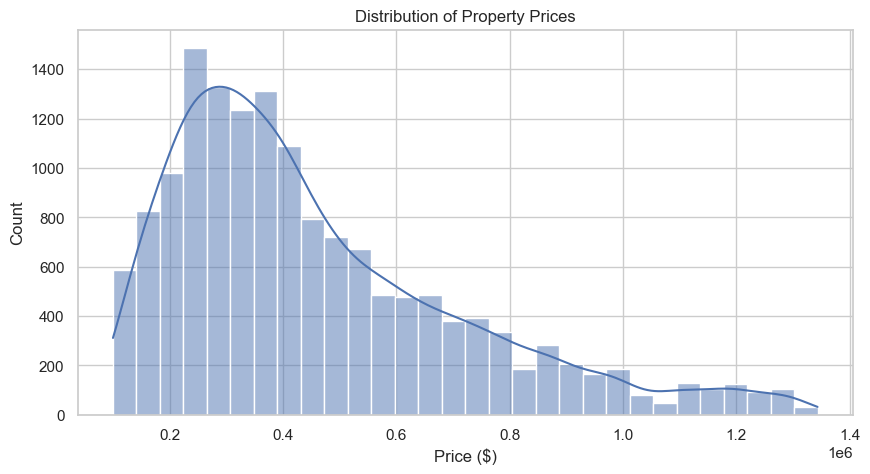

In [116]:
# Create histogram of property prices
plt.figure(figsize=(10, 5))
sns.histplot(df_merged["Price"], bins=30, kde=True)
plt.title("Distribution of Property Prices")
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.show()

#### Visualization 2: Scatter Plot of Temperature vs. Property Prices

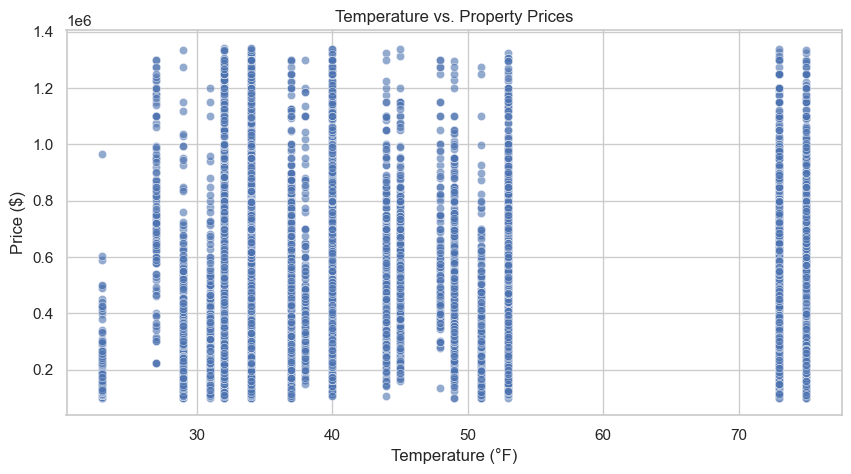

In [118]:
# Set plot style
sns.set(style="whitegrid")

# Create scatter plot
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df_merged, x="Temperature_F", y="Price", alpha=0.6)

# Add labels and title
plt.title("Temperature vs. Property Prices")
plt.xlabel("Temperature (°F)")
plt.ylabel("Price ($)")

plt.show()

#### Visualization 3: Population vs. Average Home Prices

In [120]:
# Aggregate data: Calculate average home price per state
df_avg_price = df_merged.groupby("state").agg({"Price": "mean", "Population": "first"}).reset_index()

# Format price for readability
df_avg_price["Price"] = df_avg_price["Price"].round(0)  # Round to nearest whole number

# Display the aggregated dataset
df_avg_price.head()

,state,Price,Population
0,Arizona,490099.0,7582384
1,California,825052.0,39431263
2,Colorado,556865.0,5957493
3,Florida,442525.0,23372215
4,Georgia,484510.0,11180878


C:\Users\golla\AppData\Local\Temp\ipykernel_14572\1935339324.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_avg_price, x="state", y="Price", palette="Blues_r")


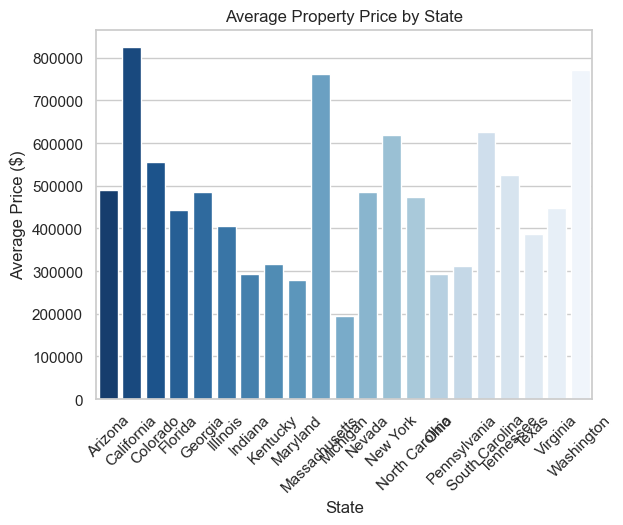

In [121]:
# Create bar chart
ax = sns.barplot(data=df_avg_price, x="state", y="Price", palette="Blues_r")

# Add labels
plt.title("Average Property Price by State")
plt.xlabel("State")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=45)

plt.show()

#### Visualization 4: Bedrooms vs Property Price

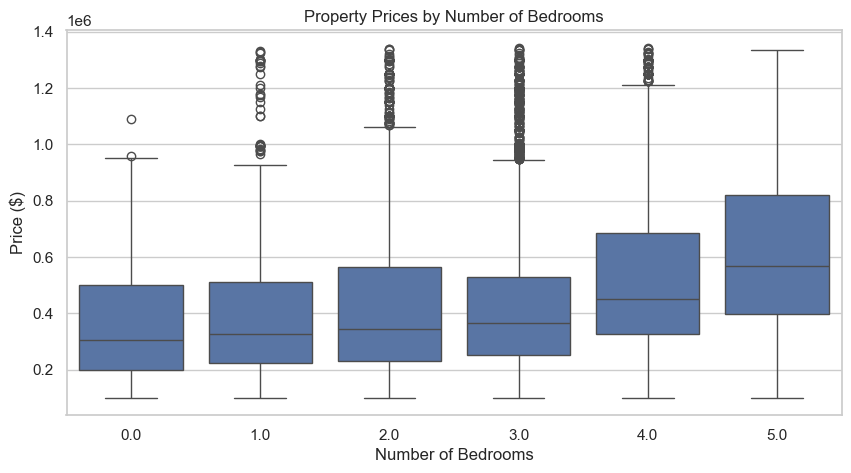

In [140]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_merged, x="Bedrooms", y="Price")

plt.title("Property Prices by Number of Bedrooms")
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price ($)")

plt.show()

#### Visualization 5: Weather Conditions vs Property Price

C:\Users\golla\AppData\Local\Temp\ipykernel_14572\3123164775.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_weather_price, x="Weather_Description", y="Price", palette="coolwarm")


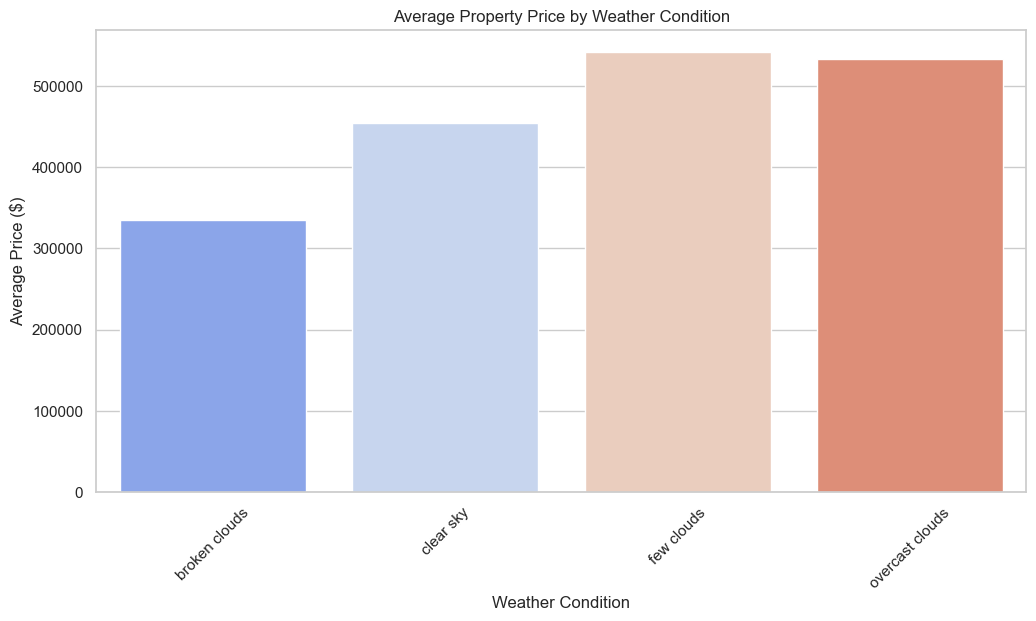

In [147]:
# Aggregate data: Calculate average home price per weather condition
df_weather_price = df_merged.groupby("Weather_Description")["Price"].mean().reset_index()

# Plot bar chart
plt.figure(figsize=(12, 6))
sns.barplot(data=df_weather_price, x="Weather_Description", y="Price", palette="coolwarm")

plt.title("Average Property Price by Weather Condition")
plt.xlabel("Weather Condition")
plt.ylabel("Average Price ($)")
plt.xticks(rotation=45)

plt.show()